In [1]:
from fnc_analysis import *
from scipy import stats as st
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf

In [2]:
#@title figure settings
# plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['svg.fonttype']='none'
ctl_col = '#D4D4D4'
stim_col = '#06e1e9'
mpl.rcParams['axes.prop_cycle']=plt.cycler(color=sns.color_palette('Set1',10))

### validating feeding for normal intake cohort

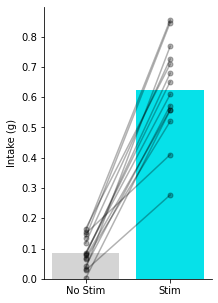

In [3]:
normal_intake = (pd.read_csv("../raw_data/normal_intake/opto_validation.csv", index_col = 0)
                   .stack()
                   .reset_index()
                   .rename(columns = {'Mouse ': 'mouse', 
                                      "level_1": 'stim', 
                                      0:'intake'})
                )
normal_intake['x'] = (normal_intake.stim=='stim').astype(int)


_,ax = plt.subplots(1,1, figsize = (3,5))
sns.barplot(data=normal_intake, x = 'stim', y = 'intake', saturation = 1,
            errorbar = None, palette = [ctl_col, stim_col], ax = ax)
normal_intake['x'] = (normal_intake.stim=='stim').astype(int)
normal_intake.groupby('mouse').plot.line(x = 'x', y = 'intake', lw = 1.5, ms = 5, alpha = .3,
                                         ax = ax, color = 'k', legend = False, marker = 'o' )
sns.despine()
plt.ylabel("Intake (g)")
plt.xticks([0,1], ['No Stim', 'Stim'])
plt.xlabel("")
plt.savefig("../figures/svgs/opto_feeding_val.svg")
plt.savefig("../figures/pdfs/opto_feeding_val.pdf")

### a plot to help validate the custom lickometer data

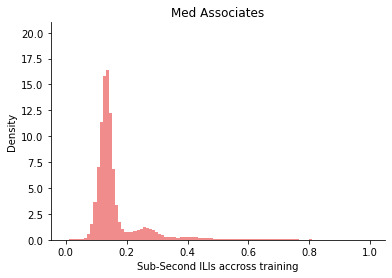

In [26]:
#load unlimited intake
dft = load_data('../pre_processed/unlimited_intake/lick_times_normal_intake.csv')
dft_train_g = subset_df(dft, 'glucose', 'training')

#compute ilis
ilis = dft_train_g.time.groupby(['mouse','day','CS']).apply(lambda x: (x.iloc[1:] - x.iloc[:-1]).reset_index(drop=True))
subs = ilis.loc[ilis<1]
bins = np.linspace(0,1, 100)
plt.hist(subs,bins, alpha = 0.5, density = True);
plt.xlabel('Sub-Second ILIs accross training')
plt.ylabel('Density')
plt.title('Med Associates')
plt.ylim(0,21)
sns.despine()
plt.savefig('../figures/pdfs/ili_resolutin_benchmark_med.pdf')
plt.savefig('../figures/svgs/ili_resolutin_benchmark_med.svg')